## Simple data generation

In [182]:
import random
import math
import pandas as pd

In [162]:
np.zeros((10))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [214]:
dataset = []
for i in range(5):
    x = []
    y = []
    d = 5*(i + 1)
    pertrub_const = 2
    n_data = 500
    for j in range(n_data):
        while True: #find cx, cy
            cx = (random.random()-0.5)*d*2
            cy = math.sqrt(d**2 - cx**2)
            if random.random() < (cy/d-0.1)**2:
                continue
            else:
                break
        negative = random.random() > 0.5
        if negative:
            cy = -cy
        perturb_x = (random.random()-0.5)*2
        perturb_y = (random.random()-0.5)*2
        cx += perturb_x
        cy += perturb_y
        x.append(cx)
        y.append(cy)
    x_np = np.array(x)
    y_np = np.array(y)
    dataset.append([np.ones(n_data)*i, x_np/26, y_np/26])


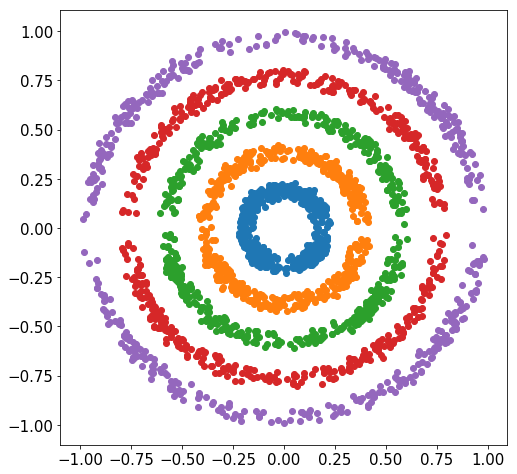

In [215]:
plt.figure(figsize=(8, 8))
for data_cls in dataset:
    plt.scatter(data_cls[1], data_cls[2])

In [216]:
data_arr = []
for i in range(len(dataset)):
    d_stacked = np.stack(dataset[i]).T
    data_arr.append(d_stacked)
data = np.concatenate(data_arr)

In [217]:
data

array([[ 0.        , -0.14043881,  0.13280387],
       [ 0.        ,  0.12163406,  0.13012907],
       [ 0.        ,  0.14748149, -0.18006181],
       ...,
       [ 4.        ,  0.37856076,  0.85144298],
       [ 4.        ,  0.58793345,  0.7143074 ],
       [ 4.        , -0.64742657,  0.67145571]])

In [218]:
pd.DataFrame(data).to_csv("./temp/ring_test.csv", index=False)